## Test notebook for developing latitude longitude binning

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt

In [5]:
#defining a function to generate random floats
def get_random(low,hi,size):
    x = np.empty(size)
    for i in range(size):
        x[i] = rn.uniform(low,hi)
    return x

In [6]:
#defining fake data for plot and station locations
fsta = pd.DataFrame({'station':np.arange(1,31,1),'lat':get_random(-10,10,30),'long':get_random(-10,10,30)})
fplt = pd.DataFrame({'station':np.arange(1,1001,1),'lat':get_random(-10,10,1000),'long':get_random(-10,10,1000)})

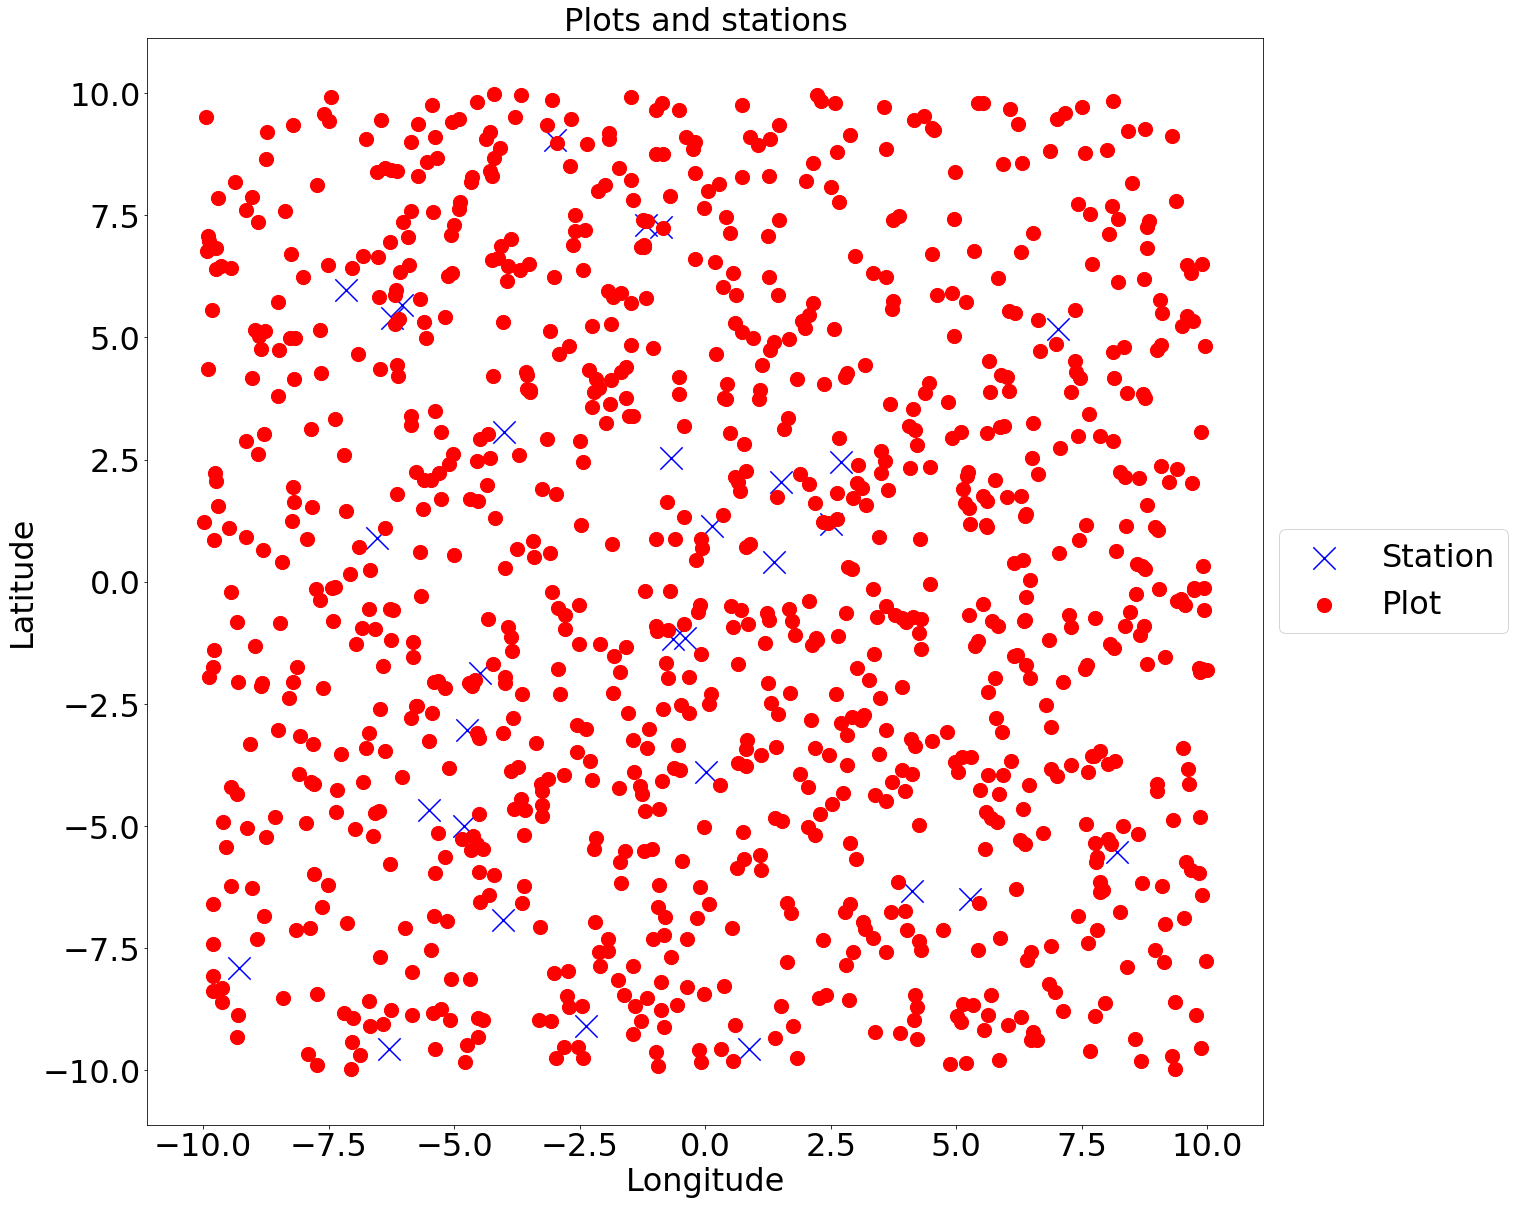

In [7]:
#ploting the raw data
plt.figure(figsize=(20,20))
plt.title('Plots and stations', fontsize = 32)
plt.scatter(fsta.long, fsta.lat, c='b', s=500, marker = 'x', label = 'Station')
plt.scatter(fplt.long, fplt.lat, s=200, c='r', label = 'Plot')
plt.xlabel('Longitude', fontsize=32)
plt.ylabel('Latitude', fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), fontsize = 32)
plt.show()

In [17]:
#defining a function that finds the stations nearest a set of longitude and latitude
def find_nearest(rg, lat1, long1, df):
    flag = True
    f=1
    m = 1
    
   #while loop that shrinks the search range until only one station is found
    while flag == True:
        
        nearest_df = df.loc[np.sqrt((lat1-df.lat)**2 + (long1-df.long)**2) <= rg]
        if (len(nearest_df) > 1):
            rg-=m
            continue
            
        if (len(nearest_df) == 0):
            rg+=m
            m*=0.1
            continue
            
        if len(nearest_df) == 1:
            return nearest_df
            flag = False
            
        return nearest_df

#function that applies find_nearest to every plot
def get_station(rg, sta,plt):
    
    plt_copy = plt.copy()
    nstation = np.empty(len(plt_copy))
    
    for i in range(len(plt_copy)):
        
        nstation[i] = np.array(find_nearest(rg, plt_copy.lat[i],plt_copy.long[i],sta).station)[0]
        
    plt_copy['nearest_station'] = nstation
    
    return plt_copy

In [18]:
fplt_wstation = get_station(40,fsta,fplt)

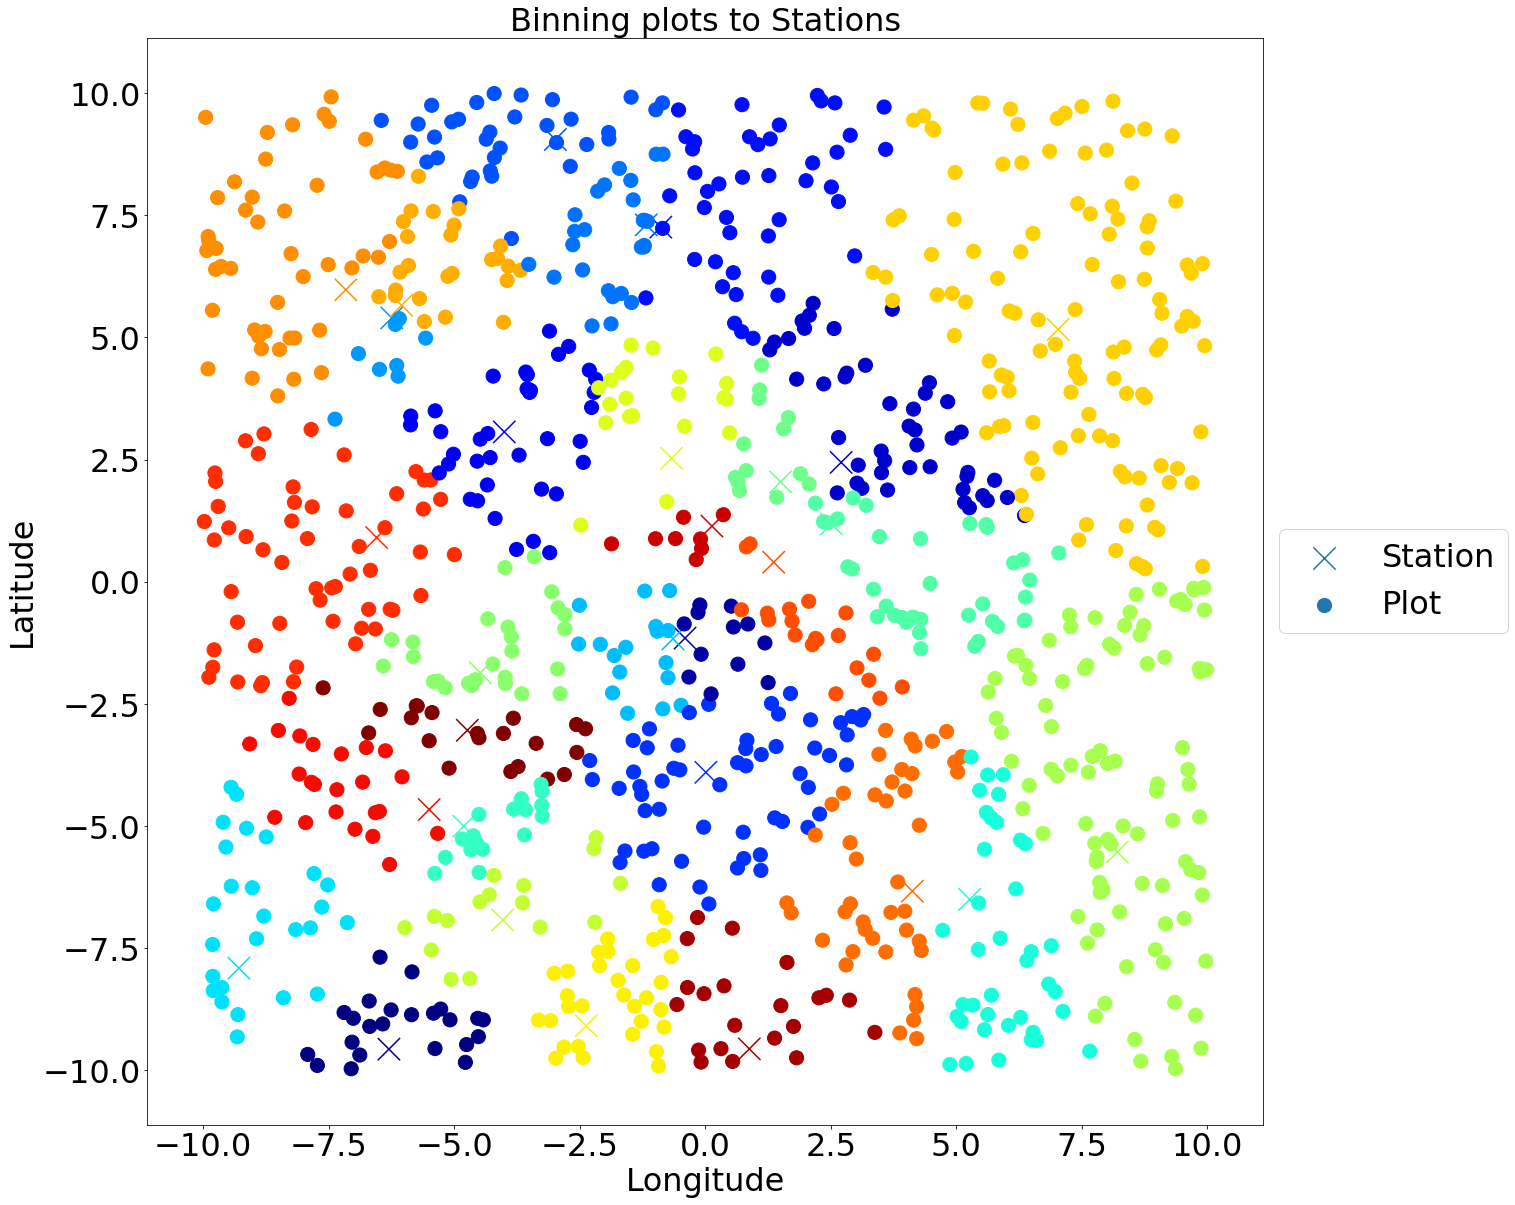

In [19]:
#ploting the results
#color corresponds to each location
plt.figure(figsize=(20,20))
plt.title('Binning plots to Stations', fontsize = 32)
plt.scatter(fsta.long, fsta.lat, c=fsta.station, s=500, marker = 'x', cmap='jet', label = 'Station')
plt.scatter(fplt_wstation.long, fplt_wstation.lat, s=200, c=fplt_wstation.nearest_station, cmap='jet', label = 'Plot')
plt.xlabel('Longitude', fontsize=32)
plt.ylabel('Latitude', fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), fontsize = 32)
plt.show()

In [20]:
def find_nearest2(lat1, long1, df):
    flag = True
    f=1
    m = 3
    rg = 3
    
   #while loop that grows the search range until one station is found
    while flag == True:
        
        nearest_df = df.loc[np.sqrt((lat1-df.lat)**2 + (long1-df.long)**2) <= rg]
        
        if (len(nearest_df) == 0):
            rg+=m
            continue
        
        if (len(nearest_df) > 1):
            rg-=m
            m*=0.1
            continue
            
        if len(nearest_df) == 1:
            return nearest_df
            flag = False
            
        return nearest_df

#function that applies find_nearest to every plot
def get_station2(sta, plt):
    
    plt_copy = plt.copy()
    nstation = np.empty(len(plt_copy))
    
    for i in range(len(plt_copy)):
        
        nstation[i] = np.array(find_nearest2(plt_copy.lat[i],plt_copy.long[i],sta).station)[0]
        
    plt_copy['nearest_station'] = nstation
    
    return plt_copy

In [23]:
fplt_wstation = get_station2(fsta,fplt)

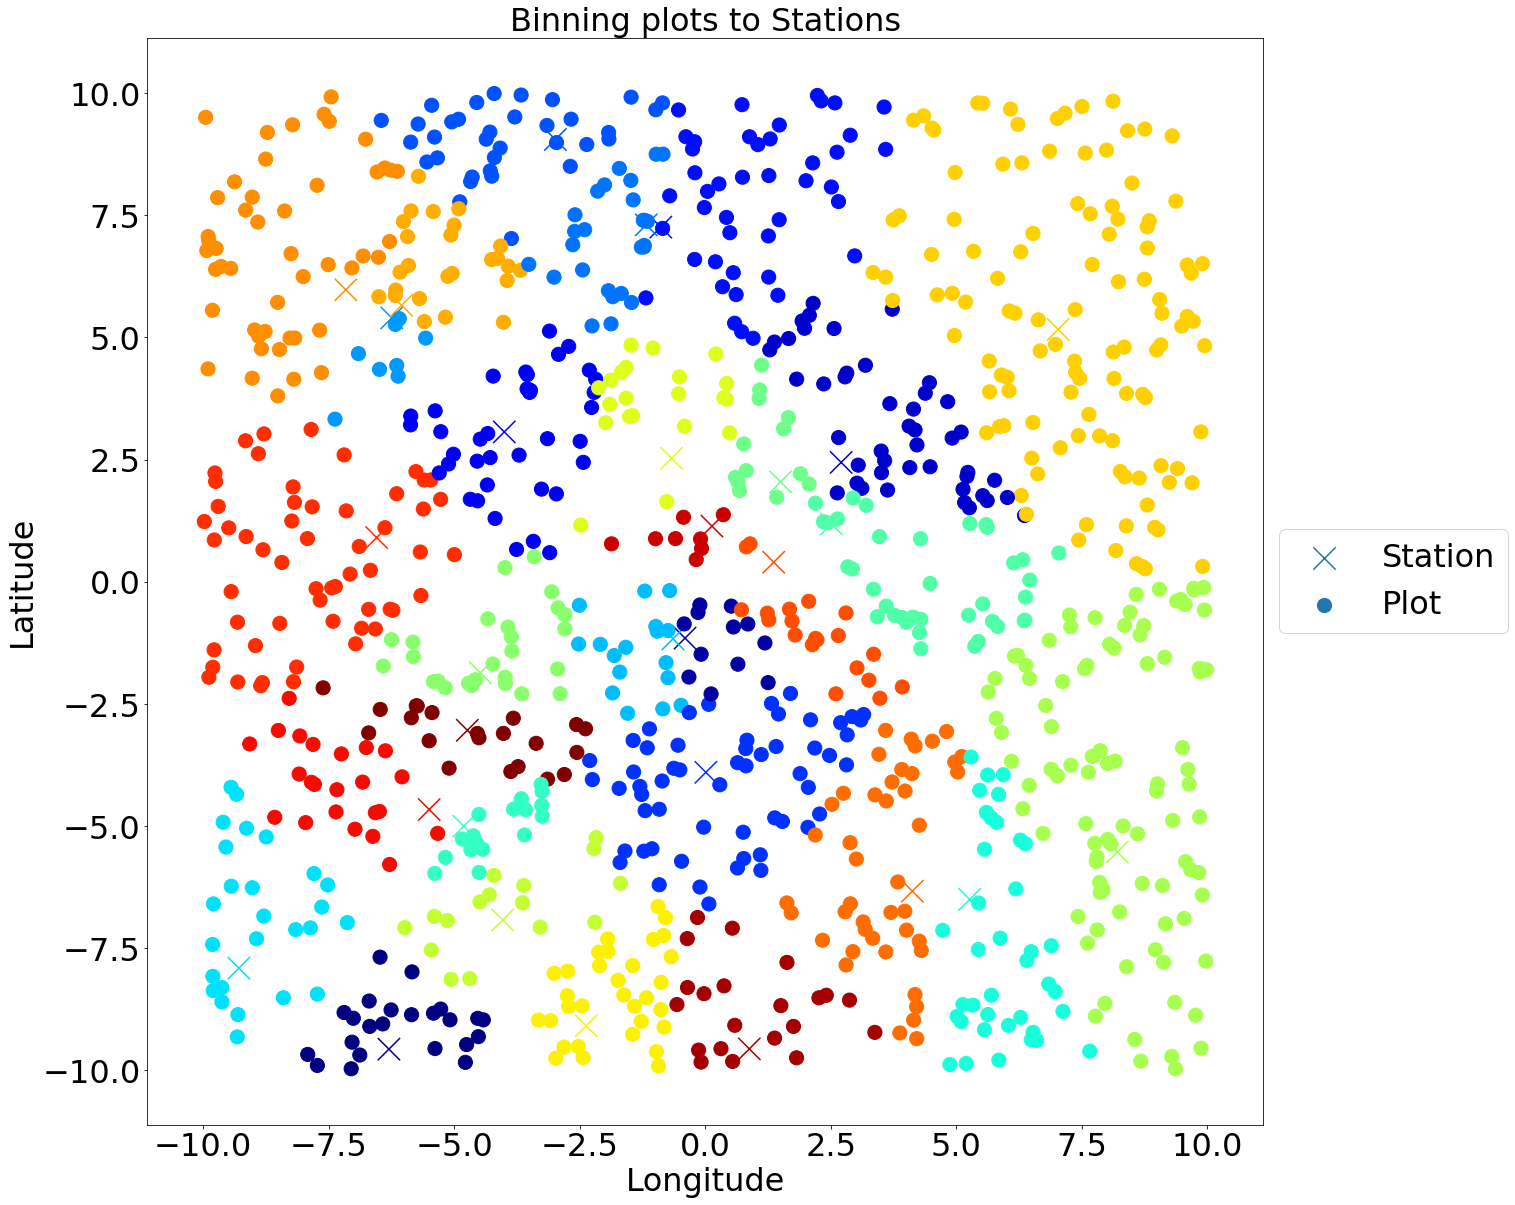

In [24]:
plt.figure(figsize=(20,20))
plt.title('Binning plots to Stations', fontsize = 32)
plt.scatter(fsta.long, fsta.lat, c=fsta.station, s=500, marker = 'x', cmap='jet', label = 'Station')
plt.scatter(fplt_wstation.long, fplt_wstation.lat, s=200, c=fplt_wstation.nearest_station, cmap='jet', label = 'Plot')
plt.xlabel('Longitude', fontsize=32)
plt.ylabel('Latitude', fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), fontsize = 32)
plt.show()

In [36]:
import timeit
%timeit (get_station2(fsta,fplt))

6.05 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
#updated algorithm as per Andrews suggestions.
def find_nearest3(lat,long,df):
    
    index_nearest = np.sqrt((lat-df.lat)**2 + (long-df.long)**2).idxmin()
    return df.station[index_nearest]

def get_station3(sta, plt):
    
    plt_copy = plt.copy()
    nstation = np.empty(len(plt_copy))
    
    for i in range(len(plt_copy)):
        
        nstation[i] = find_nearest3(round(plt_copy.lat[i],3),round(plt_copy.long[i],3),sta)
        
    plt_copy['nearest_station'] = nstation
    
    return plt_copy

In [25]:
fplt_wstation = get_station3(fsta,fplt)

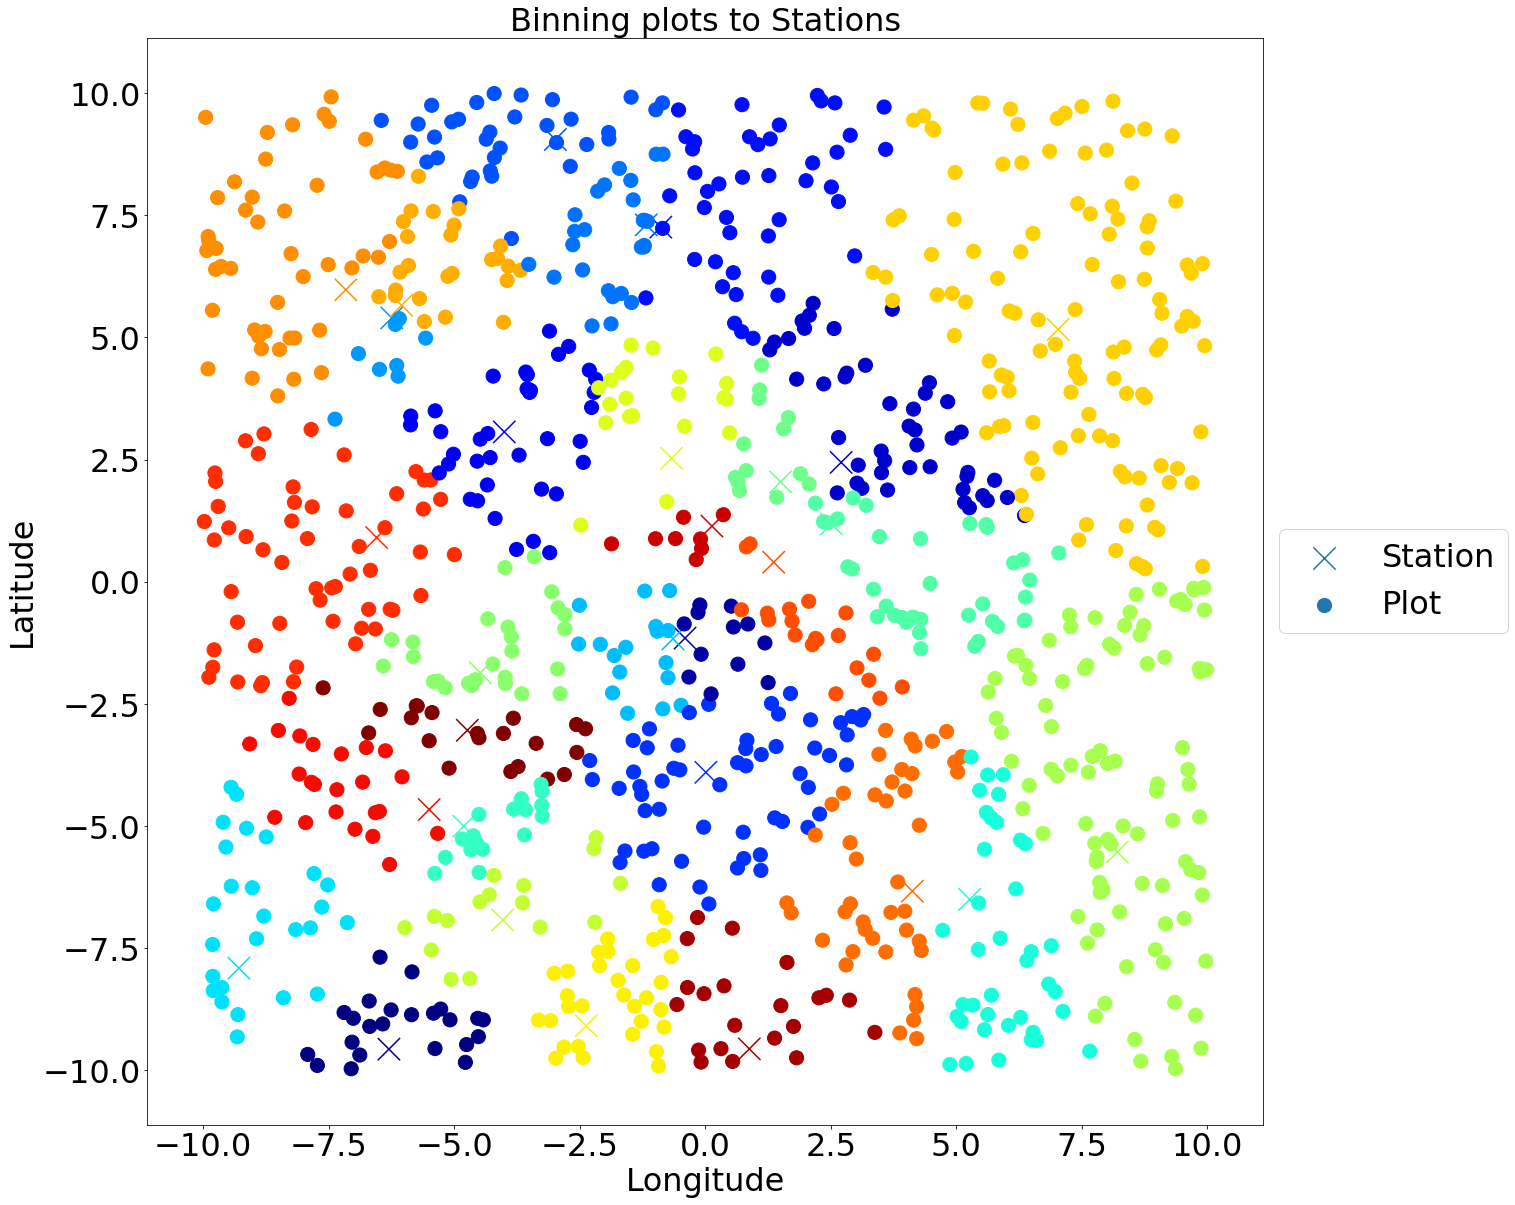

In [26]:
plt.figure(figsize=(20,20))
plt.title('Binning plots to Stations', fontsize = 32)
plt.scatter(fsta.long, fsta.lat, c=fsta.station, s=500, marker = 'x', cmap='jet', label = 'Station')
plt.scatter(fplt_wstation.long, fplt_wstation.lat, s=200, c=fplt_wstation.nearest_station, cmap='jet', label = 'Plot')
plt.xlabel('Longitude', fontsize=32)
plt.ylabel('Latitude', fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), fontsize = 32)
plt.show()